# 数据预处理

将数据放在 `data/raw` 目录下：

In [1]:
from pathlib import Path
import zipfile
import pandas as pd
import numpy as np

In [2]:
root = Path('data')
[x for x in (root/'raw').iterdir()]

[WindowsPath('data/raw/city_province.csv'),
 WindowsPath('data/raw/round1_iflyad_anticheat_testdata_feature.txt'),
 WindowsPath('data/raw/round1_iflyad_anticheat_traindata.txt')]

In [3]:
train = pd.read_table("./data/raw/round1_iflyad_anticheat_traindata.txt")
test = pd.read_table("./data/raw/round1_iflyad_anticheat_testdata_feature.txt")

D:\tool\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
D:\tool\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [4]:
all_data = train.append(test).reset_index(drop=True)

D:\tool\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
province = pd.read_csv("./data/raw/city_province.csv")

In [6]:
train.head(5)

,sid,label,pkgname,ver,adunitshowid,mediashowid,apptype,nginxtime,ip,city,...,make,ntt,carrier,os,osv,orientation,lan,h,w,ppi
0,d7460126-e071-4979-9ee8-42f72777a28a-156009070...,1,2d2664e827bcbb8b07100c7fbe072e9b,11.11.0,907d0f8c29663840491577a21c7b612a,ca64a500000d84c8fcb8a0587d0e1e0c,280.0,1.560091e+12,183.197.47.83,石家庄市,...,vivo,2.0,46000.0,Android,8.1.0,0.0,zh-CN,2340.0,1080.0,3.0
1,b660d559-db97-4b5f-9bd2-2450cb89ce77-156005074...,1,empty,NaN,10199dc8fea2e173525bc3151bd84312,3f2fc57a6e1f9c6fa4464c25cc1e88a3,319.0,1.560051e+12,106.34.14.149,开封市,...,HUAWEI,5.0,0.0,android,Android_9,0.0,NaN,1080.0,2040.0,0.0
2,f49a740e-66c3-4605-9b67-4d3079fe69cb-156008914...,0,16b81f93f4b1a35cebbf15f07683f171,3.2.1.0524.1958,83f2ecfe65f936f5f2ed59f8e8ff1d01,eea7280e1a2313e4c2e89290b01d196c,273.0,1.560089e+12,223.104.16.151,长春市,...,OPPO,2.0,46000.0,Android,8.1.0,1.0,zh-CN,2196.0,1080.0,0.0
3,fd60d096-f168-4540-b782-729d64d0fcc6-156006253...,0,empty,4.7.5,9f1eadd9092b19bc86ee0cacde1c867f,eec946a5a66c023ec9d3b2ede5900626,265.0,1.560063e+12,223.104.239.101,曲靖市,...,NaN,6.0,0.0,android,7.0,0.0,NaN,0.0,0.0,0.0
4,a037b032-a5c7-40ea-9161-26b118b12406-156007938...,1,cf4821986014a7fef9d7b7ad8de655e4,228,2af944462e43cd2f59acbbfd37445413,57b3053174973702549ba88b6017ac30,336.0,1.560079e+12,220.152.155.170,深圳市,...,EML-AL00,2.0,46000.0,Android,9,0.0,Zh-CN,2244.0,1080.0,0.0


In [7]:
train.shape

(1000000, 29)

In [11]:
all_data.shape

(1100000, 29)

In [9]:
train.dtypes

sid              object
label             int64
pkgname          object
ver              object
adunitshowid     object
mediashowid      object
apptype         float64
nginxtime       float64
ip               object
city             object
province        float64
reqrealip        object
adidmd5          object
imeimd5          object
idfamd5          object
openudidmd5      object
macmd5           object
dvctype         float64
model            object
make             object
ntt             float64
carrier         float64
os               object
osv              object
orientation     float64
lan              object
h               float64
w               float64
ppi             float64
dtype: object

In [18]:
#特性研究
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution
sns.distplot(train['label'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="label")
ax.set(title="label distribution")
sns.despine(trim=True, left=True)
plt.show()
%matplotlib inline

<Figure size 800x700 with 1 Axes>

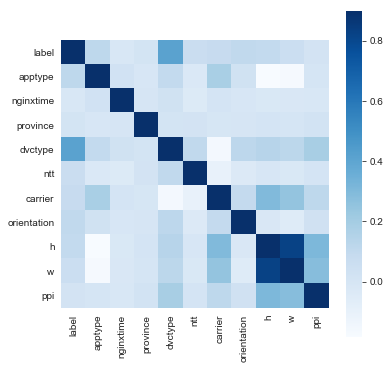

In [11]:
#相关性

corr = train.corr()
plt.subplots(figsize=(6,6))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

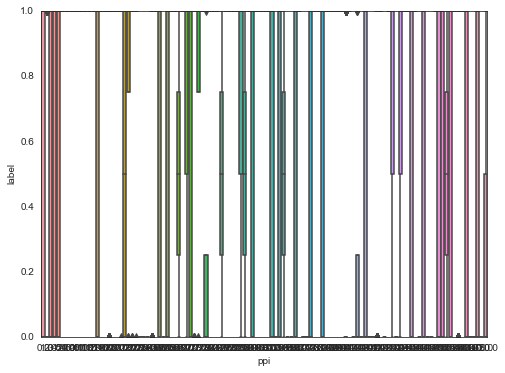

In [12]:

data = pd.concat([train['label'], train['ppi']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=train['ppi'], y="label", data=data)
fig.axis(ymin=0, ymax=1);


In [19]:

# determine the threshold for missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(all_features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]


Percent of missing data


[('lan', 36.44),
 ('ver', 31.91),
 ('make', 12.3),
 ('city', 1.51),
 ('osv', 1.27),
 ('model', 0.41),
 ('sid', 0.0),
 ('pkgname', 0.0),
 ('adunitshowid', 0.0),
 ('mediashowid', 0.0)]

In [13]:
train_features = train.drop(['label'], axis=1)
test_features = test
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
all_features.shape


(1100000, 28)

In [14]:
object_cols=list(all_features.dtypes[all_features.dtypes==np.object].index) ##返回字段名为object类型的字段
print(object_cols)

['sid', 'pkgname', 'ver', 'adunitshowid', 'mediashowid', 'ip', 'city', 'reqrealip', 'adidmd5', 'imeimd5', 'idfamd5', 'openudidmd5', 'macmd5', 'model', 'make', 'os', 'osv', 'lan']


In [15]:
from sklearn import preprocessing

def one_hot_col(col):
    '''标签编码'''
    lbl = preprocessing.LabelEncoder()
    lbl.fit(col)
    return lbl

In [16]:
for col in object_cols:
    if col!='sid':
        train[col]=one_hot_col(train[col].astype(str)).transform(train[col].astype(str))


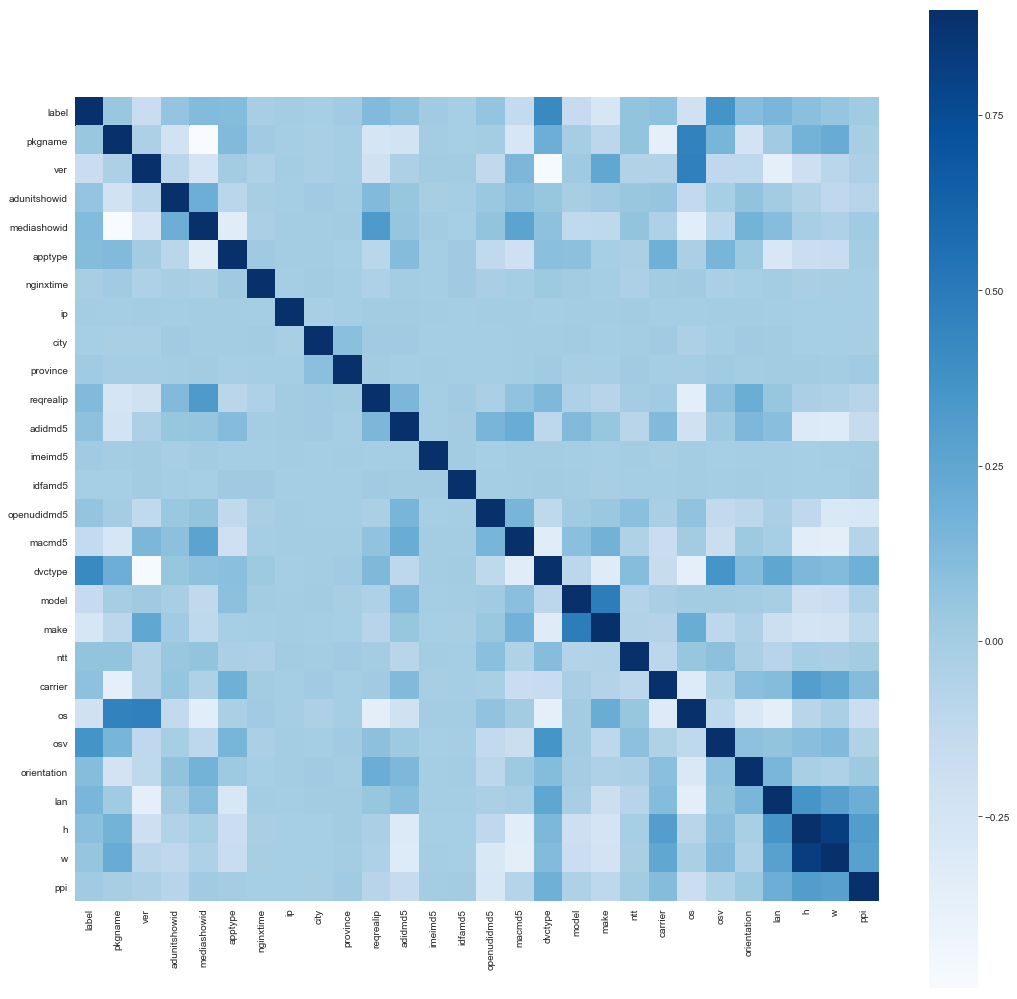

In [20]:
#相关性

corr = train.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [24]:

train['begin_time']=train['sid'].apply(lambda x:int(x.split('-')[-1])) ##请求会话时间
train['nginxtime-begin_time']=train['nginxtime']-train['begin_time'] ##请求会话时间 与 请求到达服务时间的差
test['begin_time']=test['sid'].apply(lambda x:int(x.split('-')[-1]))
test['nginxtime-begin_time']=test['nginxtime']-test['begin_time']

In [25]:
#增加一些特征
train['size'] = (np.sqrt(train['h']**2 + train['w'] ** 2) / 2.54) / 1000
train['ratio'] = train['h'] / train['w']
train['px'] = train['ppi'] * train['size']
train['mj'] = train['h'] * train['w']
#model clear

In [26]:
for fea in ['model','make','lan']:
    train[fea] = train[fea].astype('str')
    train[fea] = train[fea].map(lambda x:x.upper())

    from urllib.parse import unquote

    def url_clean(x):
        x = unquote(x,'utf-8').replace('%2B',' ').replace('%20',' ').replace('%2F','/').replace('%3F','?').replace('%25','%').replace('%23','#').replace(".",' ').replace('??',' ').\
                               replace('%26',' ').replace("%3D",'=').replace('%22','').replace('_',' ').replace('+',' ').replace('-',' ').replace('__',' ').replace('  ',' ').replace(',',' ')
        
        if (x[0]=='V') & (x[-1]=='A'):
            return "VIVO {}".format(x)
        elif (x[0]=='P') & (x[-1]=='0'):
            return "OPPO {}".format(x)
        elif (len(x)==5) & (x[0]=='O'):
            return "Smartisan {}".format(x)
        elif ('AL00' in x):
            return "HW {}".format(x)
        else:
            return x

    train[fea] = train[fea].map(url_clean)
#model_equal_make
train['big_model'] = train['model'].map(lambda x:x.split(' ')[0])
train['model_equal_make'] = (train['big_model']==train['make']).astype(int)

In [28]:
cat_col = [i for i in train.select_dtypes(object).columns if i not in ['sid','label']]

In [31]:
from sklearn.preprocessing import LabelEncoder
for i in cat_col:
    lbl = LabelEncoder()
    train[i+"_count"] = train.groupby([i])[i].transform('count')
    train[i+"_rank"] = train[i+"_count"].rank(method='min')
    train[i] = lbl.fit_transform(train[i].astype(str))
   
    
for i in ['h','w','ppi','ratio']:
    train['{}_count'.format(i)] = train.groupby(['{}'.format(i)])['sid'].transform('count')
    train['{}_rank'.format(i)] = train['{}_count'.format(i)].rank(method='min')

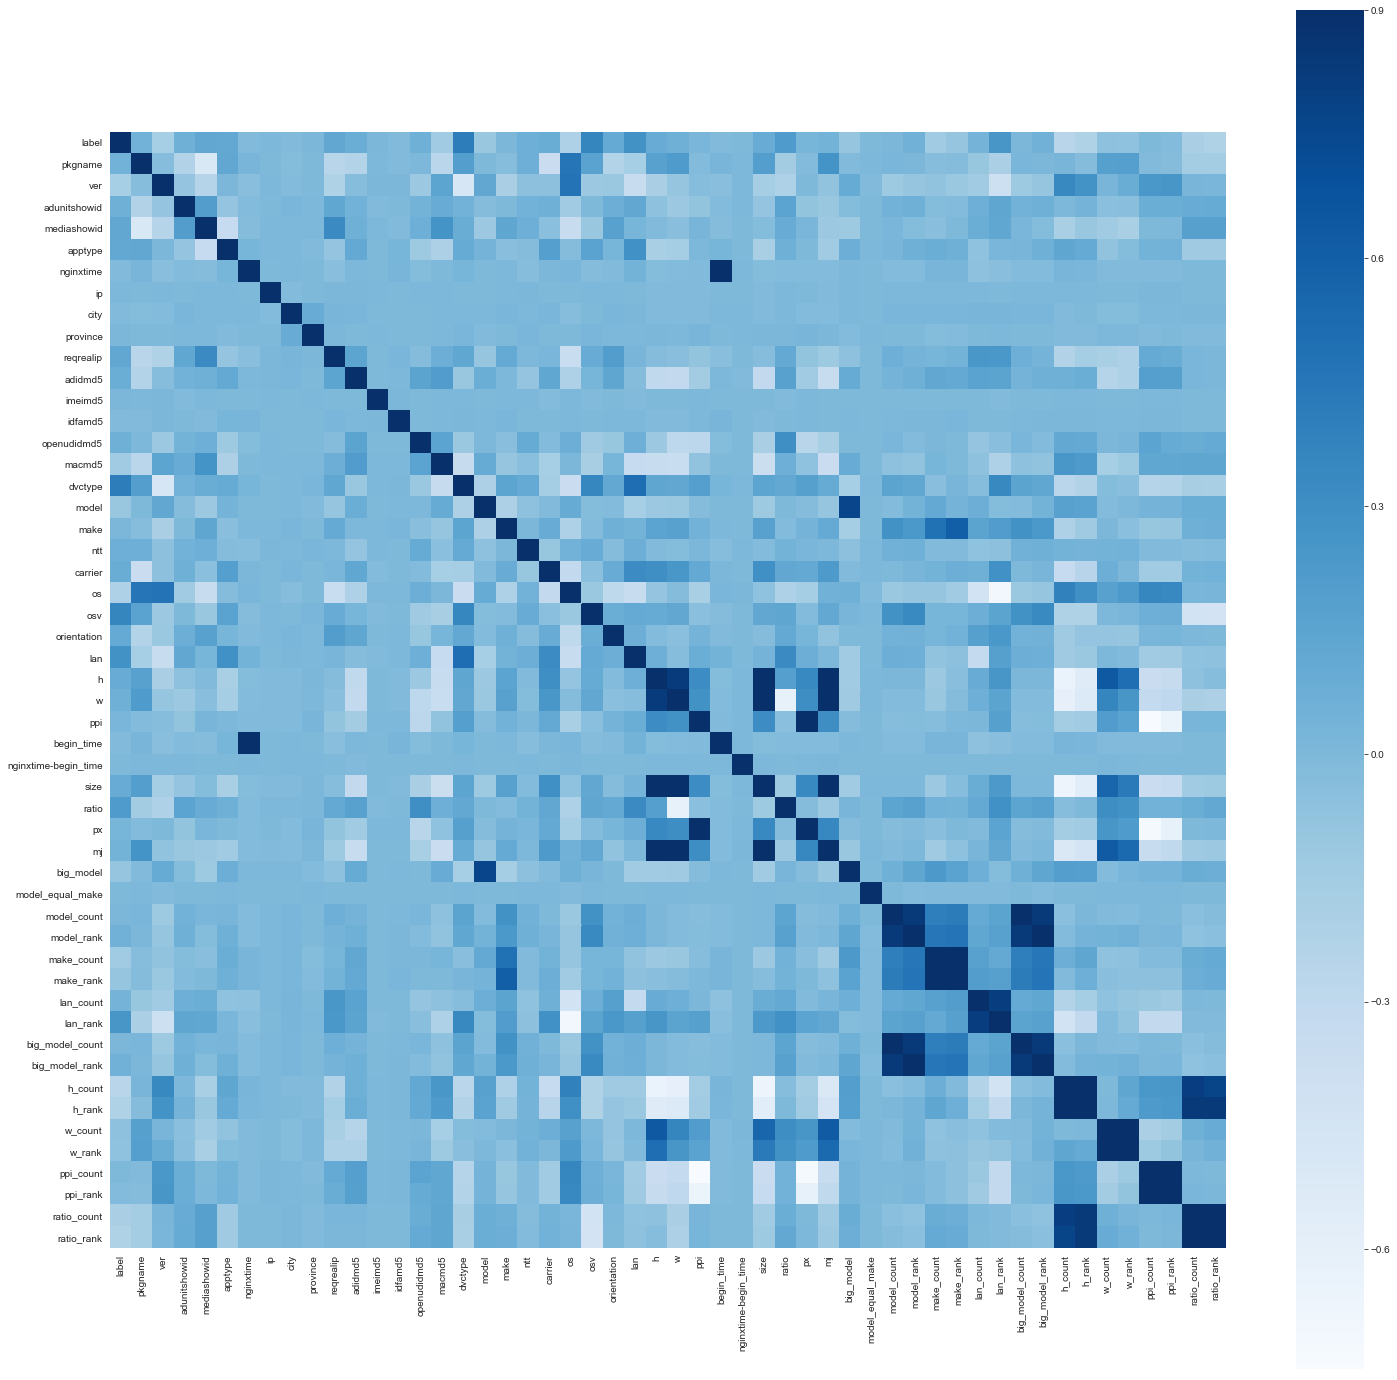

In [40]:

corr = train.corr()
plt.subplots(figsize=(25,25))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True)

In [53]:

# determine the threshold for missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(all_features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('sid', 0.0),
 ('pkgname', 0.0),
 ('ver', 0.0),
 ('adunitshowid', 0.0),
 ('mediashowid', 0.0),
 ('apptype', 0.0),
 ('nginxtime', 0.0),
 ('ip', 0.0),
 ('city', 0.0),
 ('province', 0.0)]

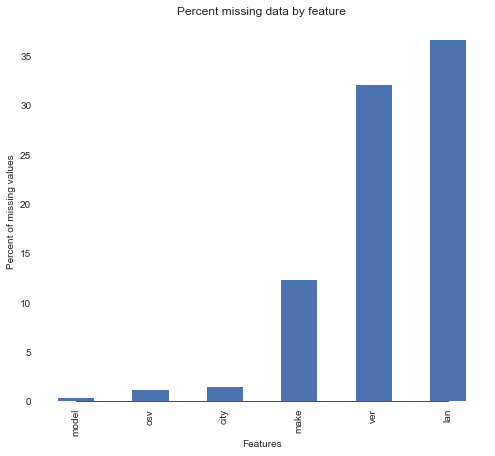

In [40]:

# Visualize missing values
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
sns.set_color_codes(palette='deep')
missing = round(train.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="b")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

In [45]:
#lan 语言 ver app版本 make 厂商 osv 操作系统版本 model 机型

int_cols = ['label', 'apptype', 'dvctype', 'ntt', 'orientation', 'h', 'w', 'ppi']
time_cols = ['nginxtime']
train.loc[:, int_cols] = train.loc[:, int_cols].astype('int').astype('category')

In [49]:
train.dtypes

sid               object
label           category
pkgname           object
ver               object
adunitshowid      object
mediashowid       object
apptype         category
nginxtime        float64
ip                object
city              object
province         float64
reqrealip         object
adidmd5           object
imeimd5           object
idfamd5           object
openudidmd5       object
macmd5            object
dvctype         category
model             object
make              object
ntt             category
carrier          float64
os                object
osv               object
orientation     category
lan               object
h               category
w               category
ppi             category
dtype: object

In [52]:
all_features['lan'] = all_features['lan'].apply(str)
all_features['ver'] = all_features['ver'].astype(str)
all_features['make'] = all_features['make'].astype(str)
all_features['city'] = all_features['city'].astype(str)
all_features['osv'] = all_features['osv'].astype(str)
all_features['model'] = all_features['model'].astype(str)

In [57]:
# determine the threshold for missing values
def percent_missing(df):
    data = pd.DataFrame(df)
    df_cols = list(pd.DataFrame(data))
    dict_x = {}
    for i in range(0, len(df_cols)):
        dict_x.update({df_cols[i]: round(data[df_cols[i]].isnull().mean()*100,2)})
    
    return dict_x

missing = percent_missing(all_features)
df_miss = sorted(missing.items(), key=lambda x: x[1], reverse=True)
print('Percent of missing data')
df_miss[0:10]

Percent of missing data


[('sid', 0.0),
 ('pkgname', 0.0),
 ('ver', 0.0),
 ('adunitshowid', 0.0),
 ('mediashowid', 0.0),
 ('apptype', 0.0),
 ('nginxtime', 0.0),
 ('ip', 0.0),
 ('city', 0.0),
 ('province', 0.0)]

In [64]:
set(all_features['city'])

{'nan',
 '七台河市',
 '三亚市',
 '三明市',
 '三门峡市',
 '上海市',
 '上饶市',
 '东莞市',
 '东营市',
 '中卫市',
 '中山市',
 '临夏回族自治州',
 '临汾市',
 '临沂市',
 '临沧市',
 '丹东市',
 '丽水市',
 '丽江市',
 '乌兰察布市',
 '乌海市',
 '乌鲁木齐市',
 '乐山市',
 '九江市',
 '云浮市',
 '亳州市',
 '伊春市',
 '伊犁哈萨克自治州',
 '佛山市',
 '佳木斯市',
 '保定市',
 '保山市',
 '信阳市',
 '儋州市',
 '克孜勒苏柯尔克孜自治州',
 '克拉玛依市',
 '六安市',
 '六盘水市',
 '兰州市',
 '兴安盟',
 '内江市',
 '凉山彝族自治州',
 '包头市',
 '北京市',
 '北海市',
 '十堰市',
 '南京市',
 '南充市',
 '南宁市',
 '南平市',
 '南昌市',
 '南通市',
 '南阳市',
 '博尔塔拉蒙古自治州',
 '厦门市',
 '双鸭山市',
 '台州市',
 '台湾',
 '合肥市',
 '吉安市',
 '吉林市',
 '吕梁市',
 '吴忠市',
 '周口市',
 '呼伦贝尔市',
 '呼和浩特市',
 '和田地区',
 '咸宁市',
 '咸阳市',
 '哈尔滨市',
 '唐山市',
 '商丘市',
 '商洛市',
 '喀什地区',
 '嘉兴市',
 '嘉峪关市',
 '四平市',
 '固原市',
 '塔城地区',
 '大兴安岭地区',
 '大同市',
 '大庆市',
 '大理白族自治州',
 '大连市',
 '天水市',
 '天津市',
 '太原市',
 '威海市',
 '娄底市',
 '孝感市',
 '宁德市',
 '宁波市',
 '安庆市',
 '安康市',
 '安阳市',
 '安顺市',
 '定西市',
 '宜宾市',
 '宜昌市',
 '宜春市',
 '宝鸡市',
 '宣城市',
 '宿州市',
 '宿迁市',
 '岳阳市',
 '崇左市',
 '巴中市',
 '巴彦淖尔市',
 '巴音郭楞蒙古自治州',
 '常州市',
 '常德市',
 '平凉市',
 '平顶山市',
 '广元市',
 '广安市',
 '广州市',
 '庆阳市',
 '廊坊市',
 '

In [79]:
set(all_features['province'])

{-1.0, 2.0, 3.0, 27.0, 31.0, 32.0, 33.0, 34.0}

In [70]:
from datetime import datetime,timedelta
import time
all_features['time'] = pd.to_datetime(all_features['nginxtime']*1e+6) + timedelta(hours=8)
all_features['day'] = all_features['time'].dt.dayofyear
all_features['hour'] = all_features['time'].dt.hour

In [75]:
all_features['size'] = (np.sqrt(all_features['h']**2 + all_features['w'] ** 2) / 2.54) / 1000
all_features['ratio'] = all_features['h'] / all_features['w']
all_features['px'] = all_features['ppi'] * all_features['size']
all_features['mj'] = all_features['h'] * all_features['w']

In [83]:
all_features.columns

Index(['sid', 'pkgname', 'ver', 'adunitshowid', 'mediashowid', 'apptype',
       'nginxtime', 'ip', 'city', 'reqrealip', 'adidmd5', 'imeimd5', 'idfamd5',
       'openudidmd5', 'macmd5', 'dvctype', 'model', 'make', 'ntt', 'carrier',
       'os', 'osv', 'orientation', 'lan', 'h', 'w', 'ppi', 'time', 'day',
       'hour', 'size', 'ratio', 'px', 'mj'],
      dtype='object')

In [93]:
set(all_features['orientation'] )

{0.0, 1.0, 2.0, 90.0}

In [80]:
all_features.drop(['province'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder


num_col = ['h','w','size','mj','ratio','px']
cat_col = [i for i in all_features.select_dtypes(object).columns if i not in ['sid','label']]
both_col = []

for i in tqdm(cat_col):
    lbl = LabelEncoder()
    all_data[i+"_count"] = all_data.groupby([i])[i].transform('count')
    all_data[i+"_rank"] = all_data[i+"_count"].rank(method='min')
    all_data[i] = lbl.fit_transform(all_data[i].astype(str))
    both_col.extend([i+"_count",i+"_rank"])

for i in tqdm(['h','w','ppi','ratio']):
    all_data['{}_count'.format(i)] = all_data.groupby(['{}'.format(i)])['sid'].transform('count')
    all_data['{}_rank'.format(i)] = all_data['{}_count'.format(i)].rank(method='min')

feature_name = [i for i in all_data.columns if i not in ['sid','label','time']]